In [1]:
import ipyvolume as ipv
import ipyvolume.pylab as plt3d
import sympy
import tensorflow as tf
import numpy as np
from IPython.display import Latex
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

sympy.init_printing()

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/Utilities/anaconda3/lib/python3.7/s

In [7]:
# f(x)
x = sympy.Symbol('x')
func_in_x = sympy.Function('f')(x)
func_in_x

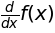

In [9]:
# Derivative w.r.t. x
func_in_x_derivative = func_in_x.diff(x)
func_in_x_derivative

In [11]:
# Substitute x = 1 in f'(x)
func_in_x_derivative.subs({'x':1})

⎛d       ⎞│   
⎜──(f(x))⎟│   
⎝dx      ⎠│x=1

## * $f(x) = x^2$

In [13]:
x = sympy.Symbol('x')
func_in_x = x**2

In [14]:
func_in_x

In [15]:
# Derivative w.r.t. x
func_in_x_derivative = func_in_x.diff(x)
func_in_x_derivative

In [16]:
# Substitute x = 1 in f'(x)
func_in_x_derivative.subs({'x':1})

### Partial Derivatives

In [22]:
x, y = sympy.symbols('x, y')
func_in_x_y = sympy.Function('f')(x, y)
func_in_x_y

In [23]:
# Derivative w.r.t. to x
func_in_x_derivative = func_in_x_y.diff(x)
func_in_x_derivative

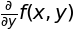

In [24]:
# Derivative w.r.t. to y
func_in_y_derivative = func_in_x_y.diff(y)
func_in_y_derivative

In [31]:
# Derivative w.r.t. x and then derivative w.r.t y
func_in_x_y_derivative = func_in_x_y.diff(x, y)
func_in_x_y_derivative

## * $f(x,y)=x^2y+sin(y)$

In [52]:
x, y = sympy.symbols('x, y')
z = x**2 * y + sympy.sin(y)
z

In [53]:
# Derivative w.r.t. x
func_in_x_derivative = z.diff(x)
func_in_x_derivative

In [54]:
# Derivative w.r.t. y
func_in_y_derivative = z.diff(y)
func_in_y_derivative

In [55]:
func_in_x_y_derivative = z.diff(x, y)
func_in_x_y_derivative

In [56]:
func_in_x_y_derivative.subs({'x':1, 'y':2})

# Gradient

In [35]:
x, y, z = sympy.symbols('x, y, z')

In [36]:
func_x_y_z = sympy.Function('f')(x, y, z)
func_x_y_z

In [39]:
func_x_y_z_gradient = [func_x_y_z.diff(variable) for variable in (x, y, z)]
sympy.Matrix(func_x_y_z_gradient)

⎡∂             ⎤
⎢──(f(x, y, z))⎥
⎢∂x            ⎥
⎢              ⎥
⎢∂             ⎥
⎢──(f(x, y, z))⎥
⎢∂y            ⎥
⎢              ⎥
⎢∂             ⎥
⎢──(f(x, y, z))⎥
⎣∂z            ⎦

In [45]:
x, y = sympy.symbols('x, y')
func_in_x_y = x**2 * y + sympy.sin(y)
func_in_x_y

In [48]:
func_x_y_gradient = [func_in_x_y.diff(variable) for variable in (x, y)]
func_x_y_gradient = sympy.Matrix(func_x_y_gradient)
func_x_y_gradient

⎡   2⋅x⋅y   ⎤
⎢           ⎥
⎢ 2         ⎥
⎣x  + cos(y)⎦

In [49]:
func_x_y_gradient.subs({'x':1, 'y':2})

⎡    4     ⎤
⎢          ⎥
⎣cos(2) + 1⎦

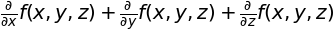

In [114]:
divergence = 0
for grad in func_x_y_z_gradient:
    divergence += grad

divergence

## * $\vec V(t,s)=\begin{bmatrix} t^2-s^2 \\ st \\ ts^2-st^2 \end{bmatrix}$

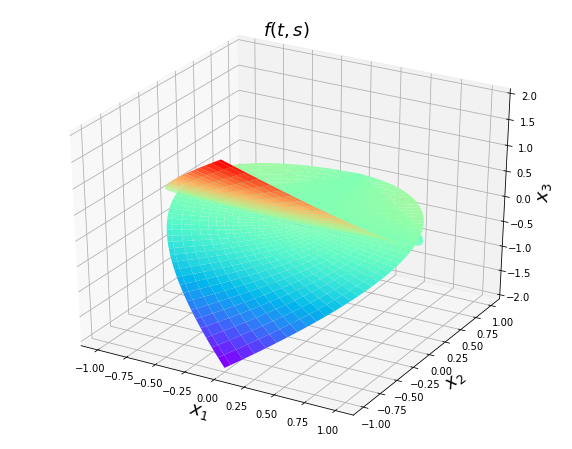

In [78]:
t = np.linspace(-1,1,100)
s = np.linspace(-1,1,100)
t, s = np.meshgrid(t,s)
x = t**2 - s**2
y = s * t
z = t * s**2 - s * t**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("$f(t,s)$", fontsize=18)
ax.plot_surface(x, y, z, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_zlim(-2, 2)
plt.show()

In [79]:
t = np.linspace(-3,3,100)
s = np.linspace(-3,3,100)
t, s = np.meshgrid(t,s)
x = t**2 - s**2
y = s * t
z = t * s**2 - s * t**2

plt3d.plot_surface(x, z, y, color="red")
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

In [80]:
t, s = sympy.symbols('t, s')
v_t_s = sympy.Matrix([[t**2 - s**2],[s * t],[t * s**2 - s * t**2]])
v_t_s

⎡    2    2 ⎤
⎢ - s  + t  ⎥
⎢           ⎥
⎢    s⋅t    ⎥
⎢           ⎥
⎢ 2        2⎥
⎣s ⋅t - s⋅t ⎦

In [87]:
v_t_s.diff(t)

⎡   2⋅t    ⎤
⎢          ⎥
⎢    s     ⎥
⎢          ⎥
⎢ 2        ⎥
⎣s  - 2⋅s⋅t⎦

In [82]:
v_t_s.diff(s)

⎡   -2⋅s   ⎤
⎢          ⎥
⎢    t     ⎥
⎢          ⎥
⎢         2⎥
⎣2⋅s⋅t - t ⎦

In [96]:
t = np.linspace(-3,3,100)
s = np.linspace(-3,3,100)
t, s = np.meshgrid(t,s)

x_t = 2 * t
y_t = s
z_t = s**2 - 2*s*t

x_s = - 2 * s
y_s = t
z_s = 2*s*t - t**2

plt3d.plot_surface(x, z, y, color="white")
plt3d.plot_surface(x_t, z_t, y_t, color="red")
plt3d.plot_surface(x_s, z_s, y_s, color="red")
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

$\vec V(x,y)=\bigg [\begin{matrix} xy \\ y^2-x^2 \end{matrix} \bigg]$

In [99]:
x, y = sympy.symbols('x, y')
v_x_y = sympy.Matrix([[x*y],[y**2 - x**2]])
v_x_y

⎡   x⋅y   ⎤
⎢         ⎥
⎢   2    2⎥
⎣- x  + y ⎦

In [100]:
v_x_y.diff(x)

⎡ y  ⎤
⎢    ⎥
⎣-2⋅x⎦

In [101]:
v_x_y.diff(y)

⎡ x ⎤
⎢   ⎥
⎣2⋅y⎦

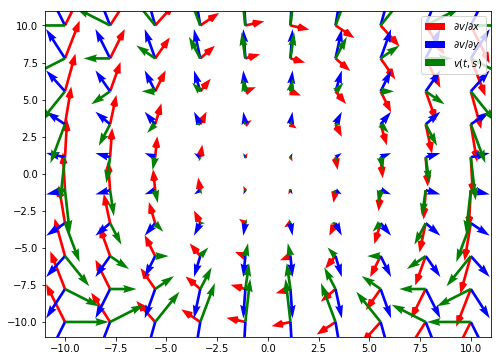

In [19]:
x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
x, y = np.meshgrid(x, y)
v_x_1 = y
v_x_2 = - 2 * x
v_y_1 = x
v_y_2 = 2 * y

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.quiver(x, y, v_x_1, v_x_2, facecolor='r', label="${\partial v}/{\partial x}$", headlength='4')
ax.quiver(x, y, v_y_1, v_y_2, facecolor='b', label="${\partial v}/{\partial y}$")
ax.quiver(x, y, x*y, y**2 - x**2, facecolor='g', label="$v(t,s)$")
plt.legend(loc='best')
plt.show()

In [115]:
x, y, z = sympy.symbols('x, y, z')

In [116]:
func_x_y_z = sympy.Function('f')(x, y, z)
func_x_y_z

In [117]:
func_x_y_z_gradient = [func_x_y_z.diff(variable) for variable in (x, y, z)]
func_x_y_z_gradient = sympy.Matrix(func_x_y_z_gradient)
func_x_y_z_gradient

⎡∂             ⎤
⎢──(f(x, y, z))⎥
⎢∂x            ⎥
⎢              ⎥
⎢∂             ⎥
⎢──(f(x, y, z))⎥
⎢∂y            ⎥
⎢              ⎥
⎢∂             ⎥
⎢──(f(x, y, z))⎥
⎣∂z            ⎦

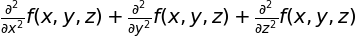

In [120]:
laplacian = 0
for i in func_x_y_z_gradient:
    laplacian = laplacian + i.diff(i.args[1])

laplacian

# * $f(x,y)=3+cos(\frac x 2)sin(\frac y 2)$

In [126]:
x, y = sympy.symbols('x, y')
z = 3 + sympy.cos(x/2)*sympy.sin(y/2)
z

In [129]:
gradient_z = [z.diff(variable) for variable in (x, y)]
gradient_z = sympy.Matrix(gradient_z)
gradient_z

⎡    ⎛x⎞    ⎛y⎞ ⎤
⎢-sin⎜─⎟⋅sin⎜─⎟ ⎥
⎢    ⎝2⎠    ⎝2⎠ ⎥
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢    ⎛x⎞    ⎛y⎞ ⎥
⎢ cos⎜─⎟⋅cos⎜─⎟ ⎥
⎢    ⎝2⎠    ⎝2⎠ ⎥
⎢ ───────────── ⎥
⎣       2       ⎦

In [131]:
laplacian = gradient_z[0].diff(x) + gradient_z[1].diff(y)
laplacian

# * $f(x,y)=e^xsin(y)$
## Harmonic function has laplacian = 0

In [134]:
X = np.arange(-6, 3, 0.1)  
Y = np.arange(-6, 3, 0.1)  
X, Y = np.meshgrid(X, Y) 
Z = np.exp(X) * np.sin(Y)

plt3d.figure(screen_capture_enabled=True)
#plt3d.plot_surface(X, Z, Y, color="green")
plt3d.plot_wireframe(X, Z, Y, color="red")
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

In [135]:
x, y = sympy.symbols('x, y')
z = sympy.exp(x) * sympy.sin(y)
z


In [136]:
gradient_z = [z.diff(variable) for variable in (x, y)]
gradient_z = sympy.Matrix(gradient_z)
gradient_z

⎡ x       ⎤
⎢ℯ ⋅sin(y)⎥
⎢         ⎥
⎢ x       ⎥
⎣ℯ ⋅cos(y)⎦

In [137]:
laplacian = gradient_z[0].diff(x) + gradient_z[1].diff(y)
laplacian